A)
1. Cree una función en Python que defina la función
$$
f(\lambda)=\int_0^\infty \frac{\sin(\lambda x)}{\operatorname{e}^x}\operatorname{d}x
$$
1. Gráfique dicha función en 0 y 100
1. Haga un segundo gráfico añadiendo la derivada de la función

B)
Construya una matriz aleatoria $3\times 3$ $\boldsymbol{Y}$ y genere la matrix
$$
\boldsymbol{A}=\boldsymbol{Y}^{\operatorname{T}}\boldsymbol{Y}
$$

1. Obtenga los autovalores y autovectores de $\boldsymbol{A}$ en orden ascendente en valor absoluto
1. Compruebe que los atovalores de $\boldsymbol{Y}$ corresponden a la raíz cuadrado de los autovalores de  $\boldsymbol{A}$ y explique porqué

#PARCIAL 2: SARA ALEJANDRA CARVAJAL CC.1193090281

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the i

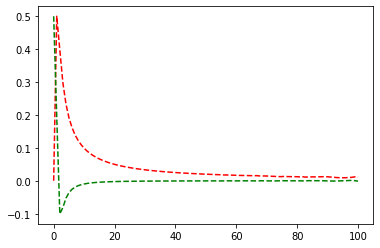

In [47]:
from scipy import integrate
import numpy as np 
import matplotlib.pyplot as plt
import sympy as sp
from scipy import misc

fun= lambda  λ: integrate.quad(lambda  x: np.sin(λ*x)/ np.exp(x) , 0,np.inf)[0]
funv=np.vectorize(fun)

λ= np.linspace(0,100,100)
y=funv(λ)



derivative = lambda x: misc.derivative(funv,x)
derv= np.vectorize(derivative)

plt.plot(λ, funv(λ), "r--")
plt.plot(λ,derv(λ),"g--")








#PUNTO B


In [28]:
import numpy as np
Y= np.random.random(size=[3,3])
Y

A= Y.T@Y
autoval= np.abs(np.linalg.eig(A)[0])
autovec= np.linalg.eig(A)[1]

autoval=autoval.tolist()
stautoval=sorted(autoval)
stautovec =np.c_[ tuple( [ np.c_[autovec[:,i]] for i in np.abs(autoval).argsort()])]

print("Los autovalores desordenados son:",autoval)
print("Los autovalores ordenados son:",stautoval)

print("Los autovectores desordenados son:\n", autovec)
print("Los autovectores ordenados son:\n", stautovec)


Los autovalores desordenados son: [2.9956012881086083, 0.1762096810956143, 0.09504264978731715]
Los autovalores ordenados son: [0.09504264978731715, 0.1762096810956143, 2.9956012881086083]
Los autovectores desordenados son:
 [[-0.73416922 -0.61935198 -0.27820618]
 [-0.55966065  0.78401987 -0.26850101]
 [-0.3844158   0.04142413  0.92223019]]
Los autovectores ordenados son:
 [[-0.27820618 -0.61935198 -0.73416922]
 [-0.26850101  0.78401987 -0.55966065]
 [ 0.92223019  0.04142413 -0.3844158 ]]


In [45]:
autovY= np.linalg.svd(Y)[1]
autovY= np.abs(autovY)
Autoval= np.linalg.svd(A)[1]

print("Los autovalores de Y son:",autovY)
sqrtautovA= np.sqrt(Autoval)
print("La raiz de los autovalores de autovalores de A son:",sqrtautovA)




Los autovalores de Y son: [1.73078054 0.41977337 0.30828988]
La raiz de los autovalores de autovalores de A son: [1.73078054 0.41977337 0.30828988]


Teniendo en cuenta el teorema de parametrización de Casas Ibarra se considera a A una matriz simetrica que cumple con el teorema 1 enunciado en el curso, la matriz cuadrada A se puede escribir como $$
\boldsymbol{A}=\boldsymbol{Y}^{\operatorname{T}}\boldsymbol{Y}
$$, se garantiza entonces que para esta matriz exista una matriz ortogonal $\boldsymbol{H}$ arbitraria, por definicion de matriz ortogonal, su traspuesta es igual a la inversa de $\boldsymbol{H}$, tomando como punto de partida igualdad dada en el punto, podemos afirmar que $\boldsymbol{D}_{λ}= \boldsymbol{D}_\sqrt{λ}{D}_\sqrt{λ}= ({D}_\sqrt{λ})^2 $ realizando esta descomposición y asumiendo que existe una matriz arbitraria R que tambien cumple con las propiedades de H se llega a la conclusión de que  $$\boldsymbol{Y}_{diag}= \boldsymbol{R}{D}_\sqrt{λ}{U^t} $$

desde donde se evidencia que los vectores propios de Y son la raiz de los vectores propios de la matriz inicial A